In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from datetime import *

In [3]:
combined_df = pd.DataFrame()

In [4]:
csv_files = glob.glob(r'C:\Users\Effer\OneDrive - University of Kent\MAST4016\COVID-19-master\COVID-19-master\csse_covid_19_data\csse_covid_19_daily_reports\01-**-2023.csv')


In [5]:
for csv_file in csv_files:
    df = pd.read_csv(csv_file,usecols= ['Country_Region','Confirmed','Recovered','Deaths'],sep=',')
    file_name=csv_file[-14:]
    df.insert(0,"Date",datetime.strptime(file_name[0:10],'%m-%d-%Y'))
    combined_df = pd.concat([combined_df, df])


In [6]:
df_uk_us = combined_df[combined_df.Country_Region.isin(["US","United Kingdom"])]


In [7]:
df_uk_us_dly = df_uk_us.groupby(['Date','Country_Region'])[['Deaths', 'Confirmed','Recovered']].sum().reset_index(drop=False)

In [8]:
df_uk_dly = df_uk_us_dly[df_uk_us_dly.Country_Region.isin(["United Kingdom"])]

In [9]:
import matplotlib.dates as mdates

def PlotGraph(df,Column,graphtitle):
    plt.figure(figsize=(20,6))
    plt.yticks(fontsize=5);
    plt.xticks(df['Date'], fontsize=10,rotation=90);
    plt.ylabel("Number of People", fontsize=10)
    plt.xlabel("Date", fontsize=10)
    plt.title(graphtitle)
    plt.plot(df['Date'],pd.to_numeric(df[Column]), marker='o')
    dtFmt = mdates.DateFormatter('%d-%b-%Y')
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.show()

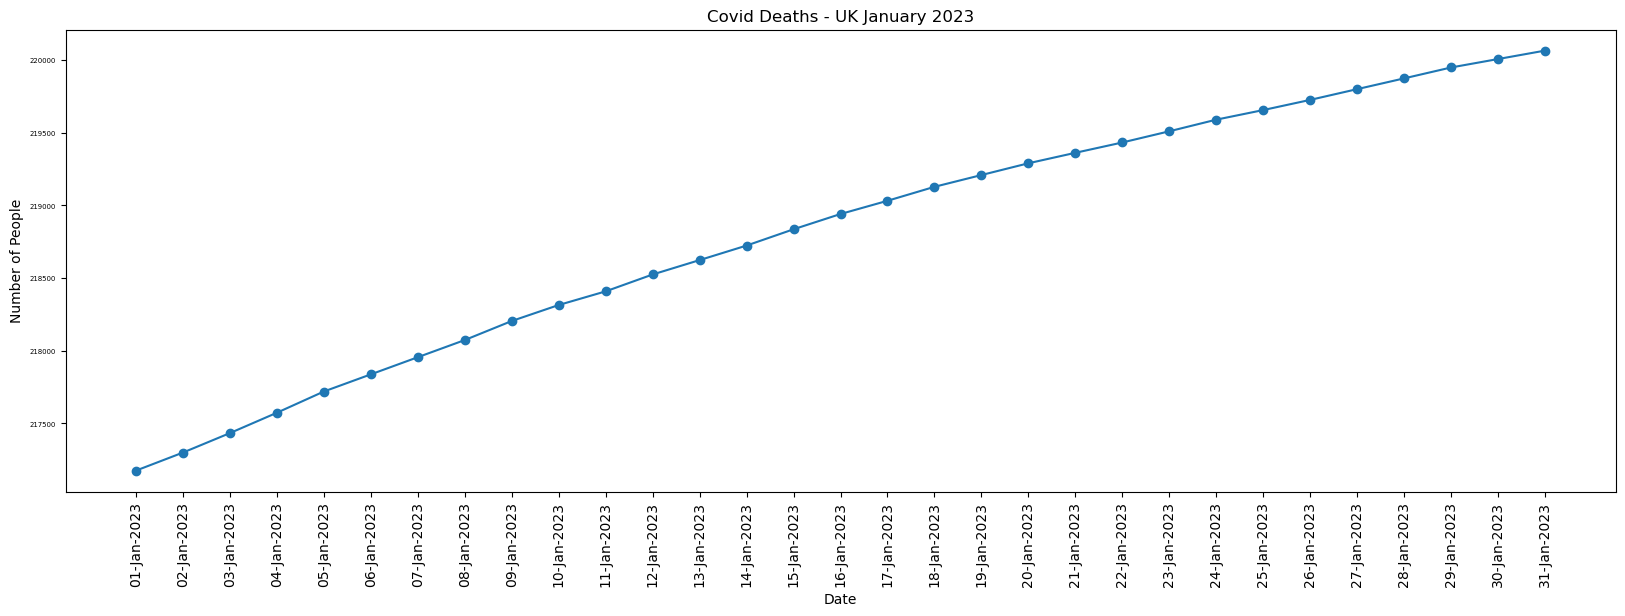

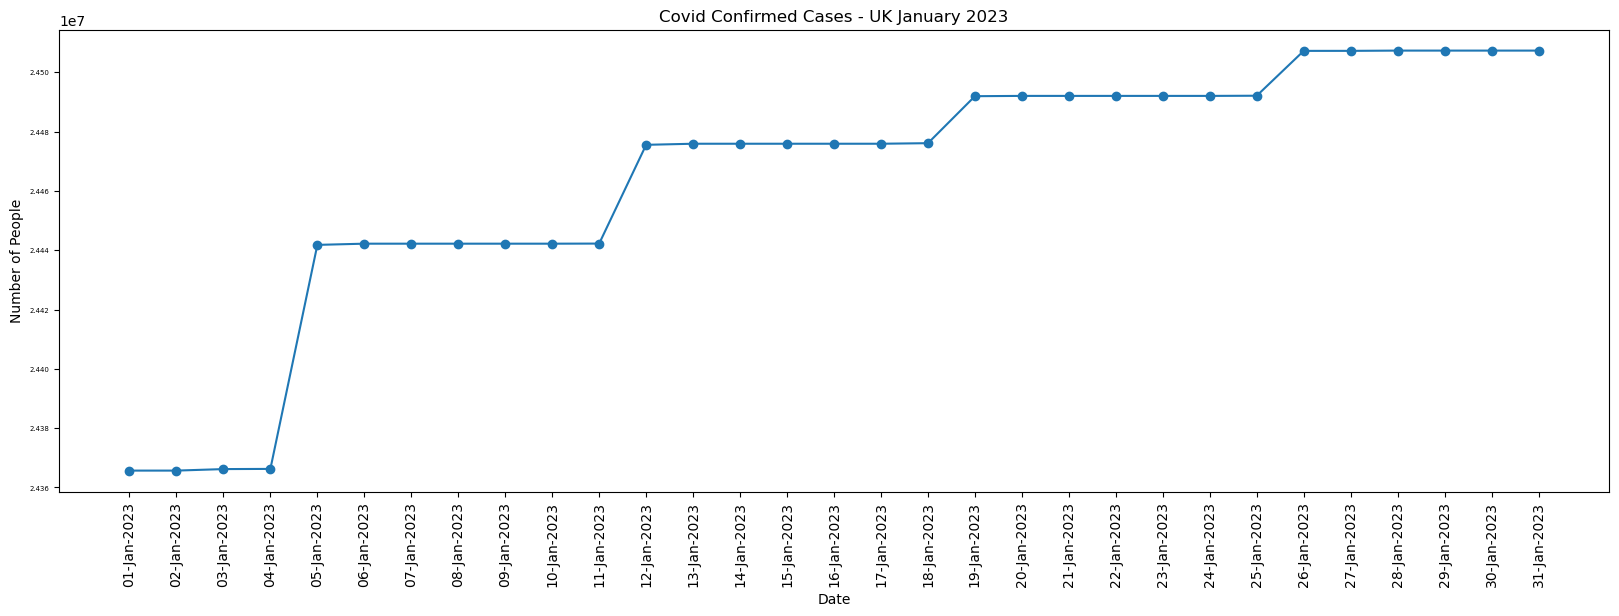

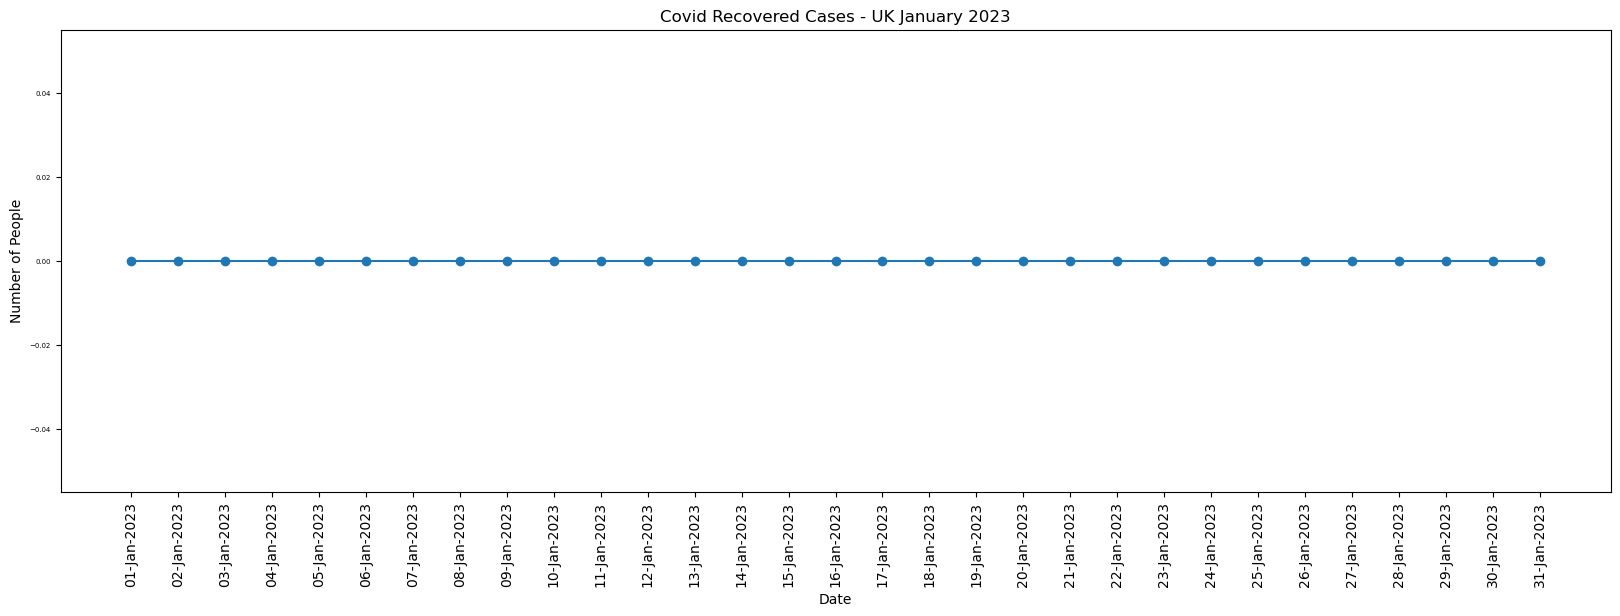

In [10]:
PlotGraph(df_uk_dly,"Deaths","Covid Deaths - UK January 2023")
PlotGraph(df_uk_dly,"Confirmed","Covid Confirmed Cases - UK January 2023")
PlotGraph(df_uk_dly,"Recovered","Covid Recovered Cases - UK January 2023")

In [11]:
df_us_dly = df_uk_us_dly[df_uk_us_dly.Country_Region.isin(["US"])]

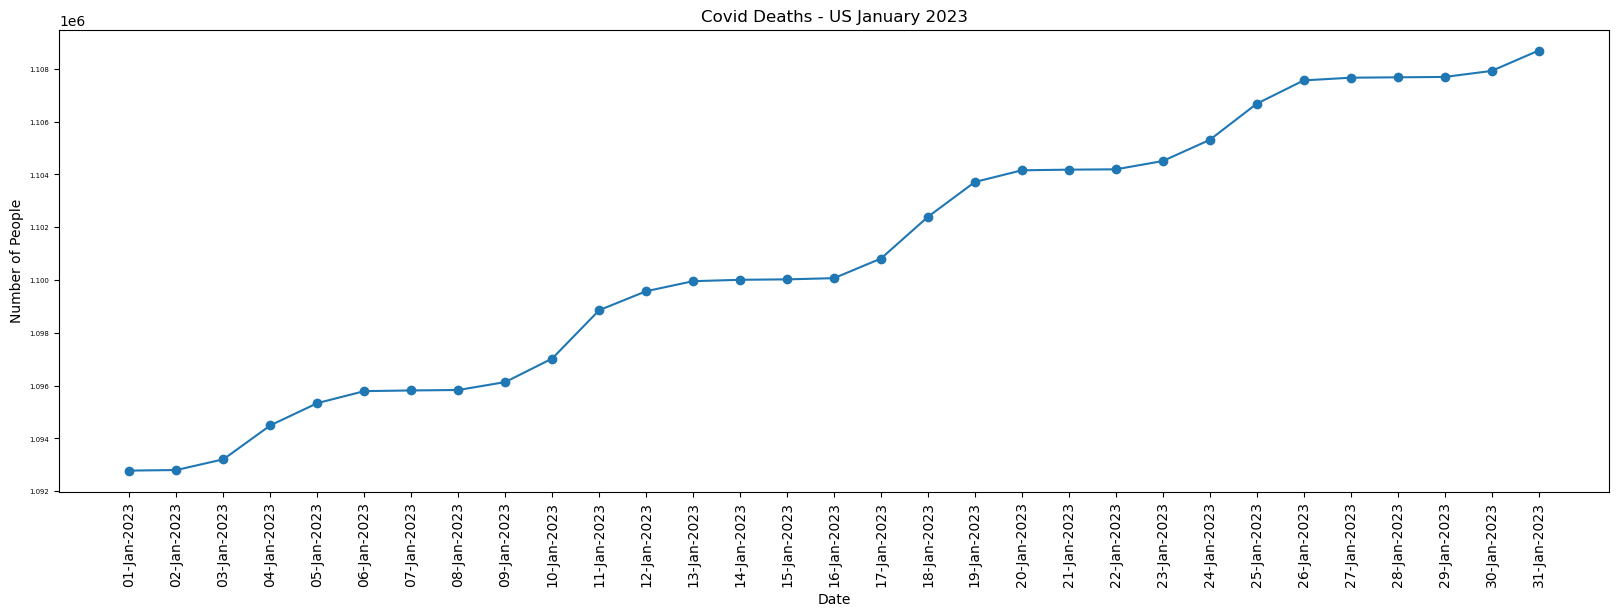

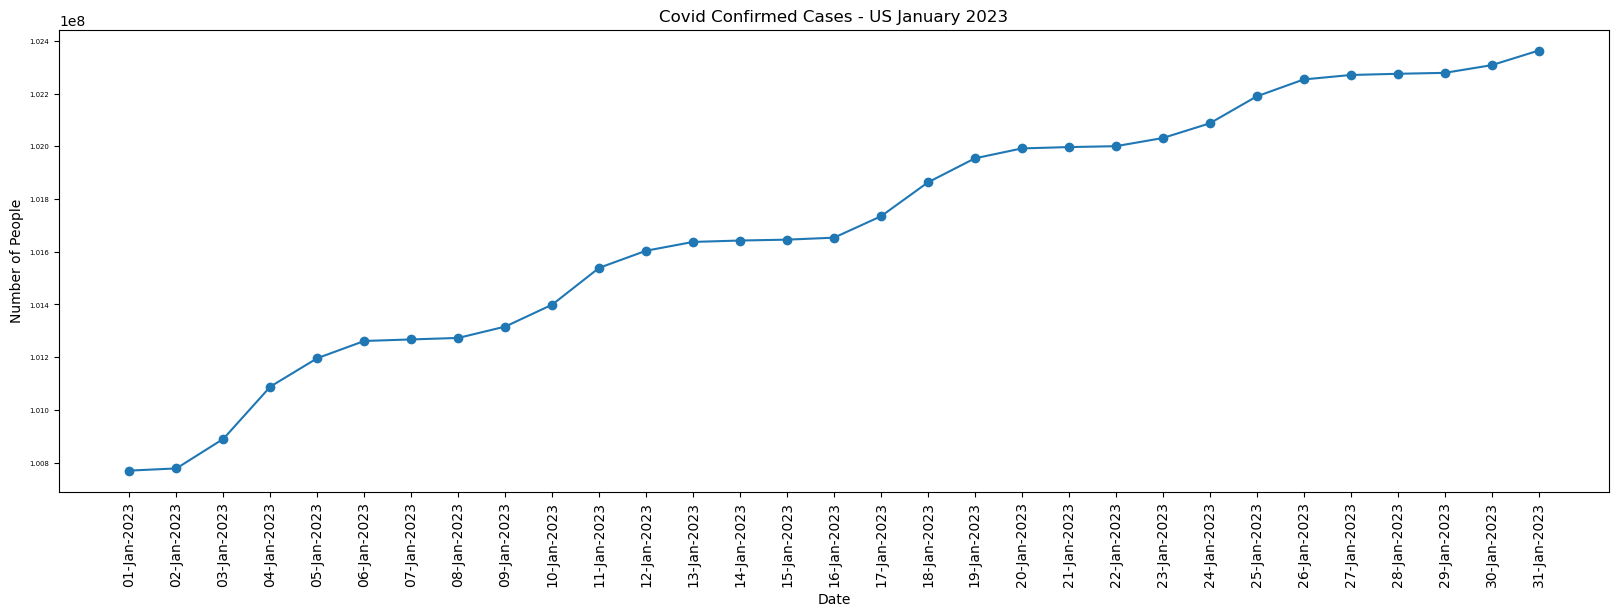

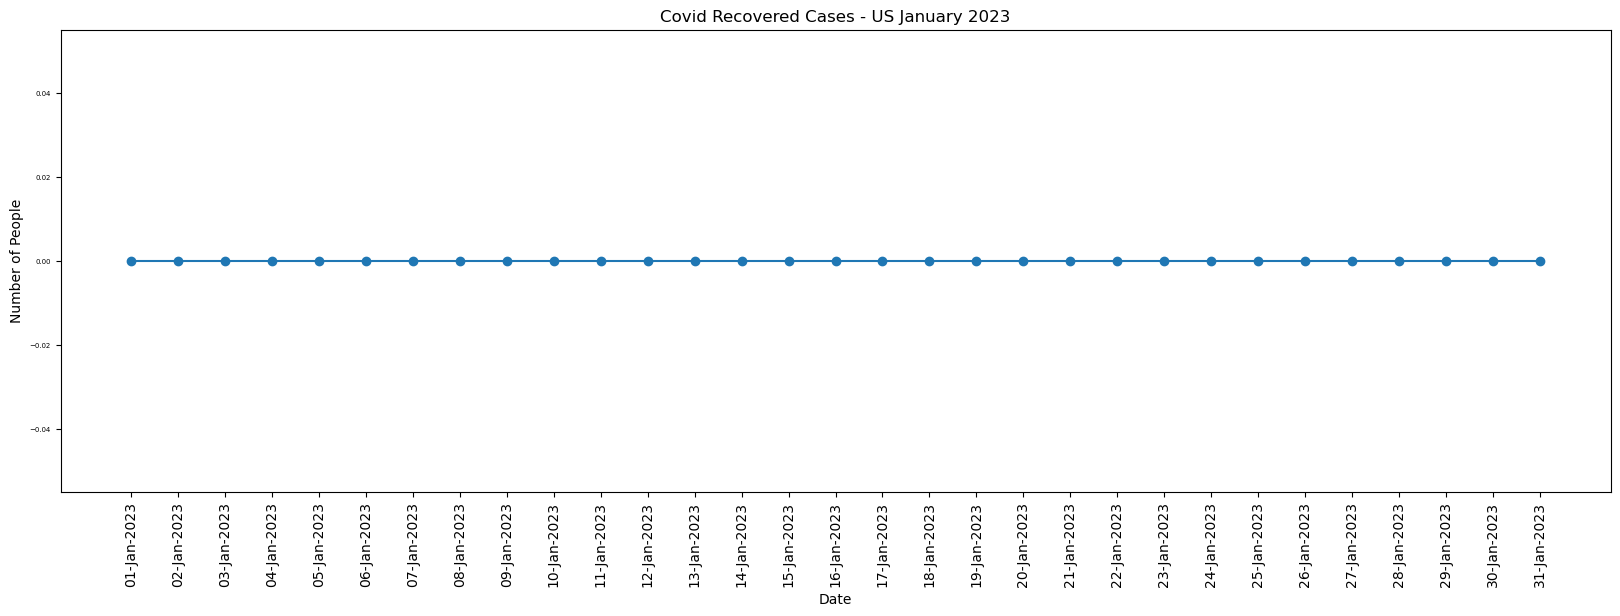

In [12]:
PlotGraph(df_us_dly,"Deaths","Covid Deaths - US January 2023")
PlotGraph(df_us_dly,"Confirmed","Covid Confirmed Cases - US January 2023")
PlotGraph(df_us_dly,"Recovered","Covid Recovered Cases - US January 2023")

In [13]:
all_df = pd.DataFrame()
csv_path = "C:\\Users\\Effer\\OneDrive - University of Kent\\MAST4016\\COVID-19-master\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_daily_reports\\"
start_date = date(2020, 1, 22)
end_date = date(2020, 3, 1)
delta = timedelta(days=1)
while start_date <= end_date:
    csv_file=csv_path+start_date.strftime("%m-%d-%Y")+'.csv'
    try:
        dfc = pd.read_csv(csv_file,usecols= ['Country/Region','Confirmed','Recovered','Deaths'],sep=',')
        file_name=csv_file[-14:]
        dfc.insert(0,"Date",datetime.strptime(file_name[0:10],'%m-%d-%Y'))
        #dfc.insert(0,"Date",start_date.strftime("%m-%d-%Y"))
        all_df = pd.concat([all_df, dfc])
    except:
        pass
    start_date += delta


In [14]:
all_df = all_df.rename(columns={'Country/Region': 'Country_Region'})
df_china = all_df[all_df.Country_Region.isin(["Mainland China"])]
df_UK2020 = all_df[all_df.Country_Region.isin(["United Kingdom"])]

In [15]:
df_china_dly = df_china.groupby(['Date','Country_Region'])[['Deaths', 'Confirmed','Recovered']].sum().reset_index(drop=False)

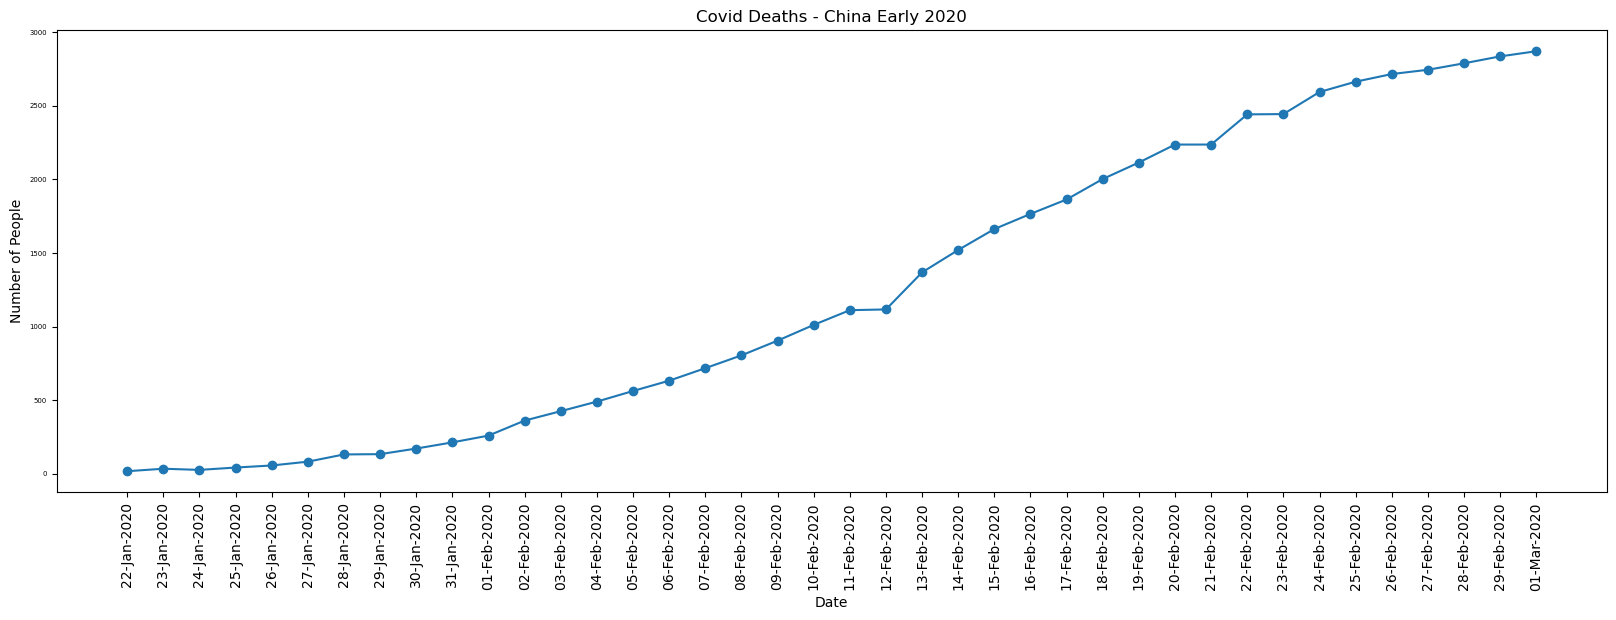

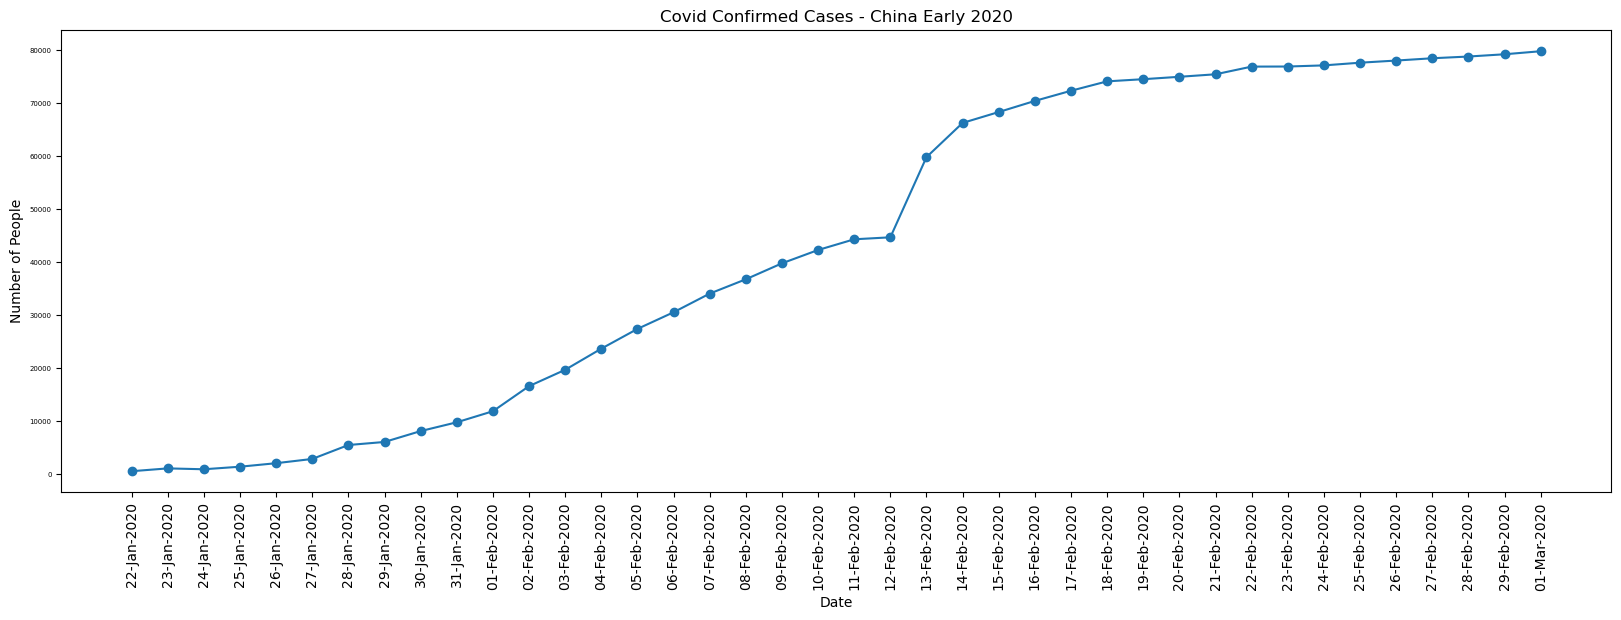

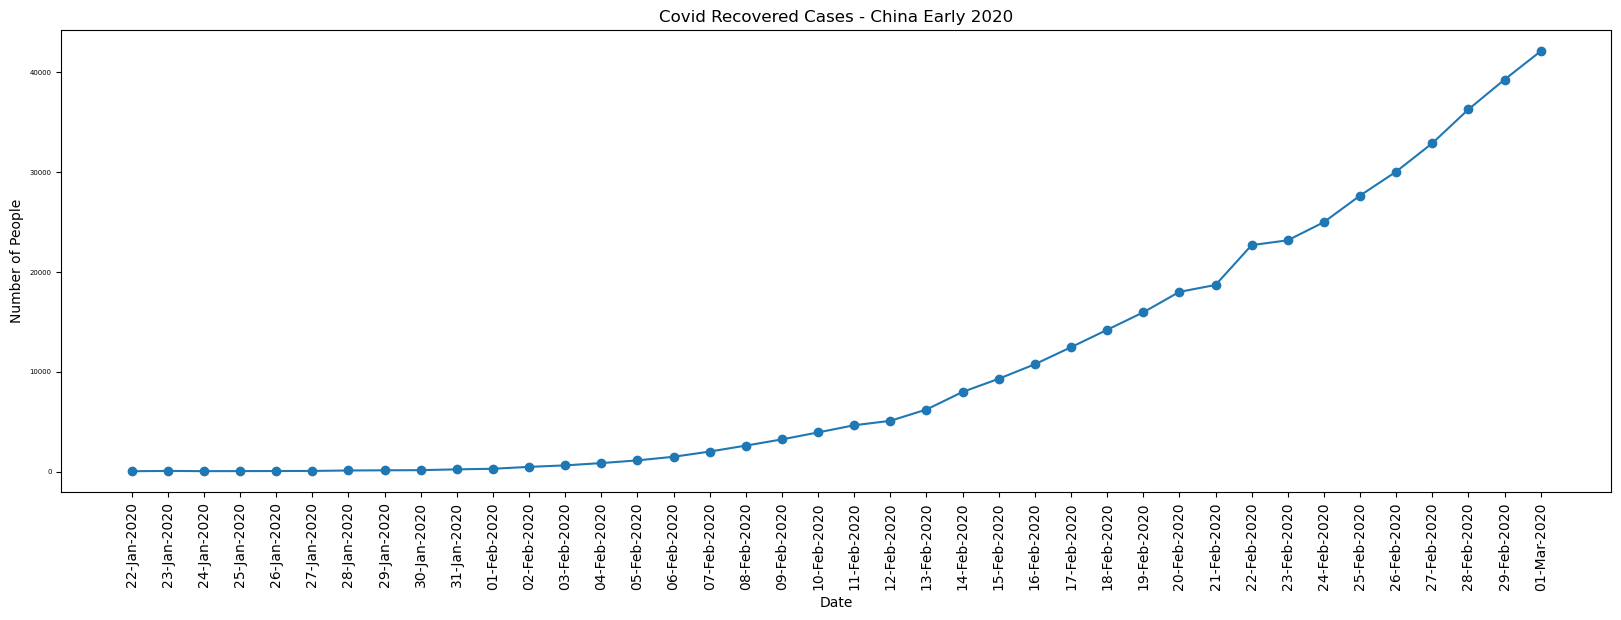

In [16]:
PlotGraph(df_china_dly,"Deaths","Covid Deaths - China Early 2020")
PlotGraph(df_china_dly,"Confirmed","Covid Confirmed Cases - China Early 2020")
PlotGraph(df_china_dly,"Recovered","Covid Recovered Cases - China Early 2020")

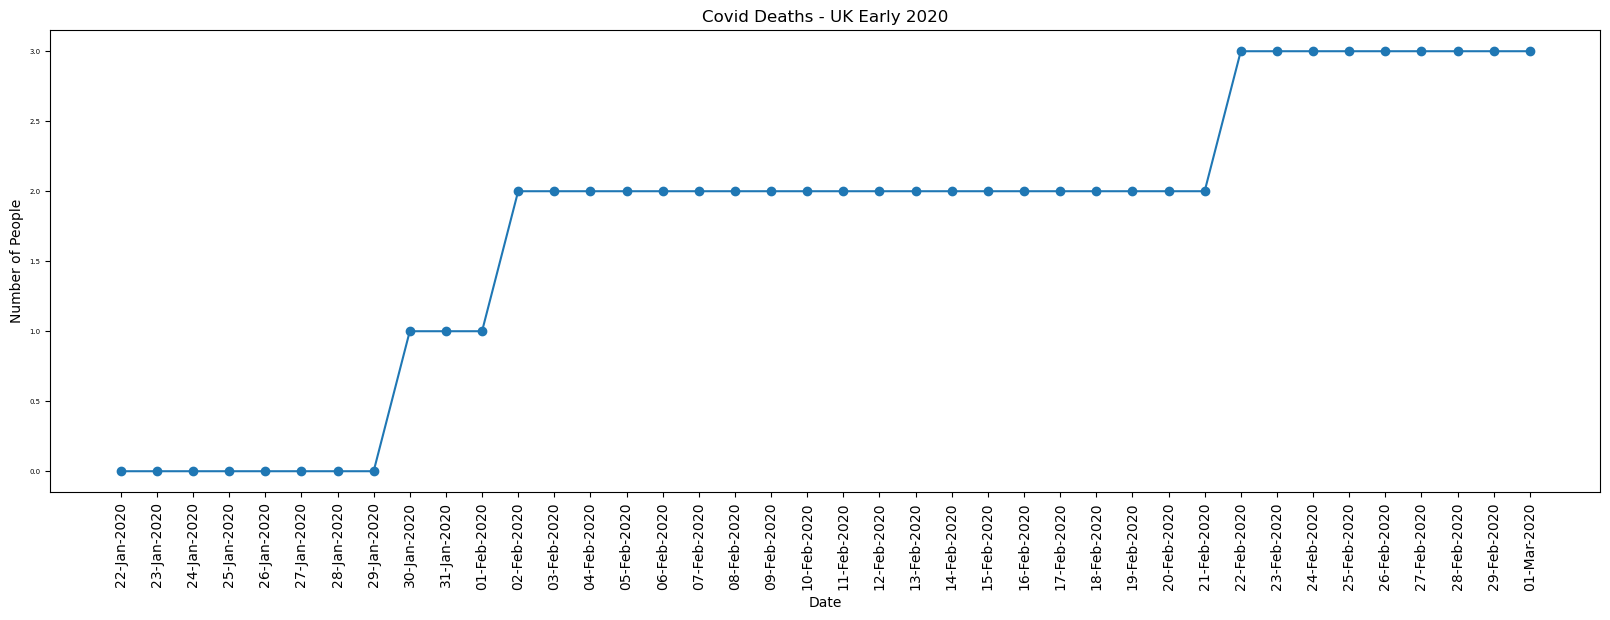

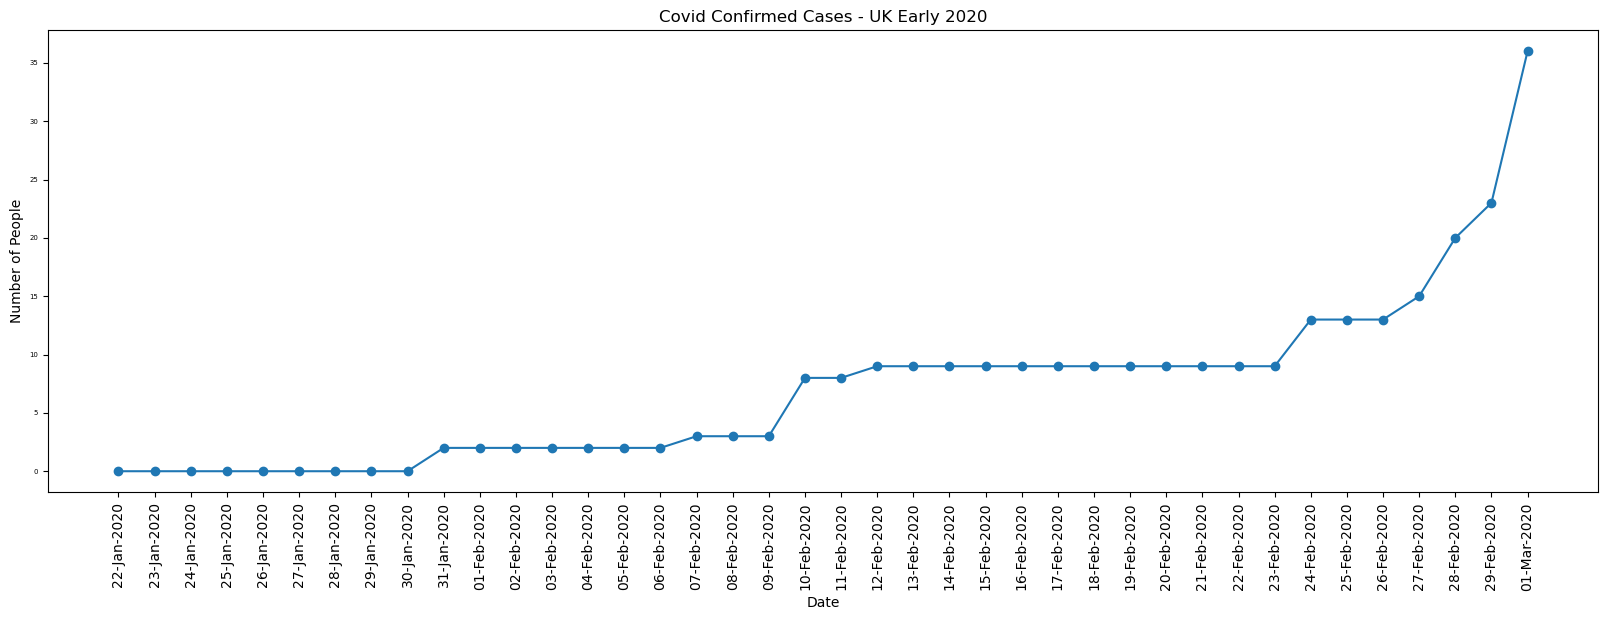

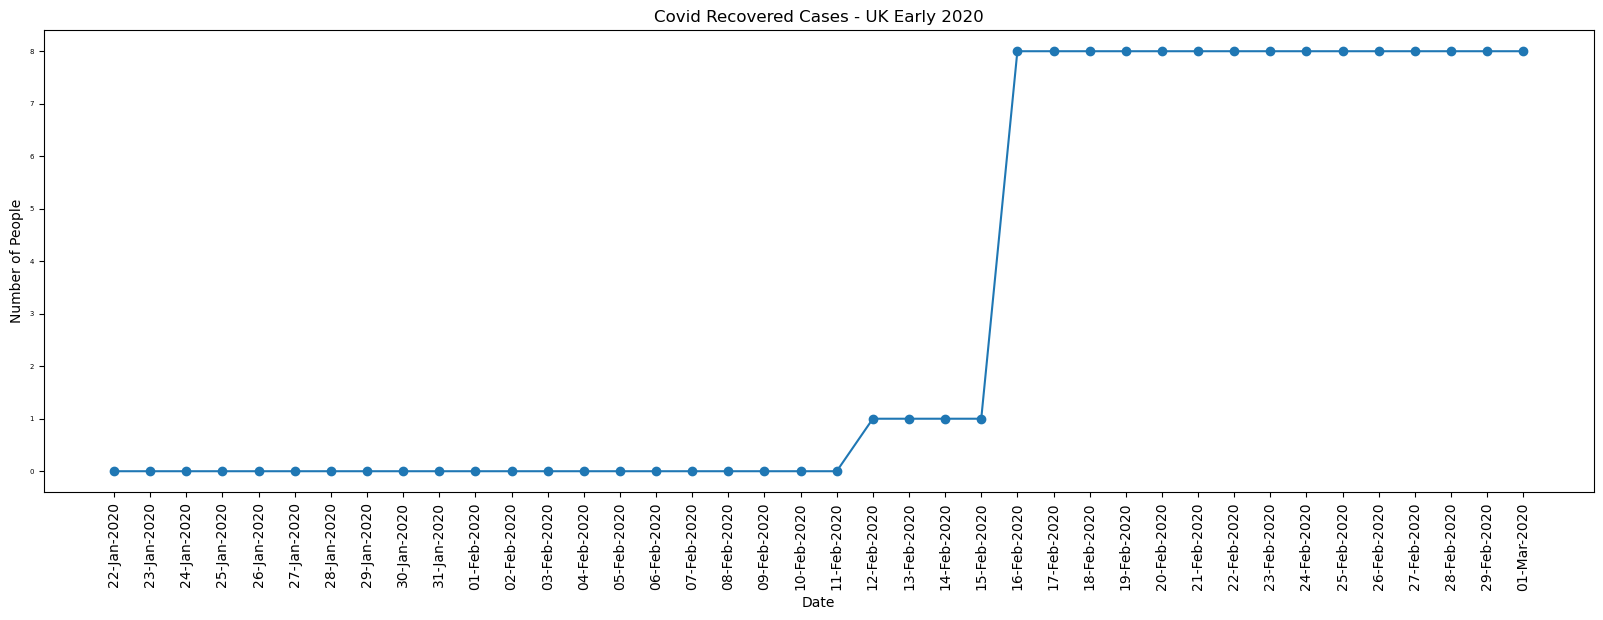

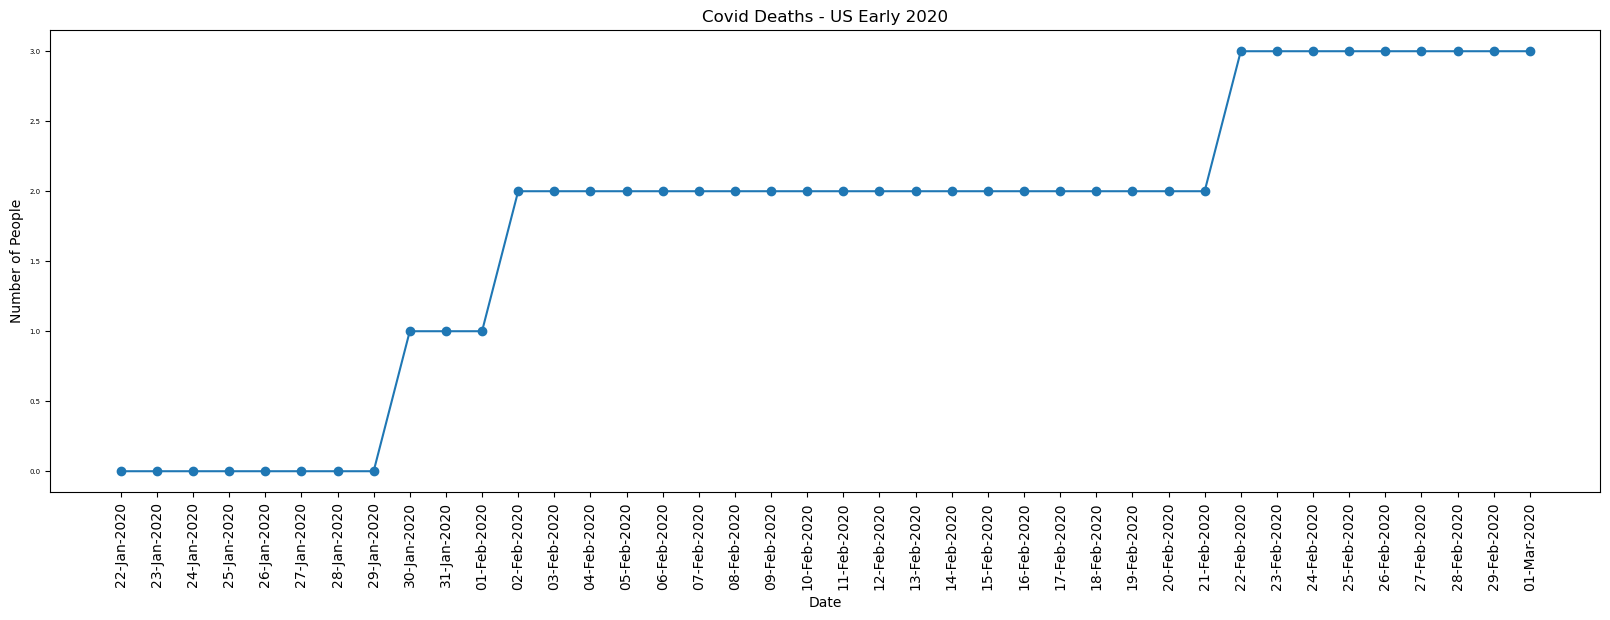

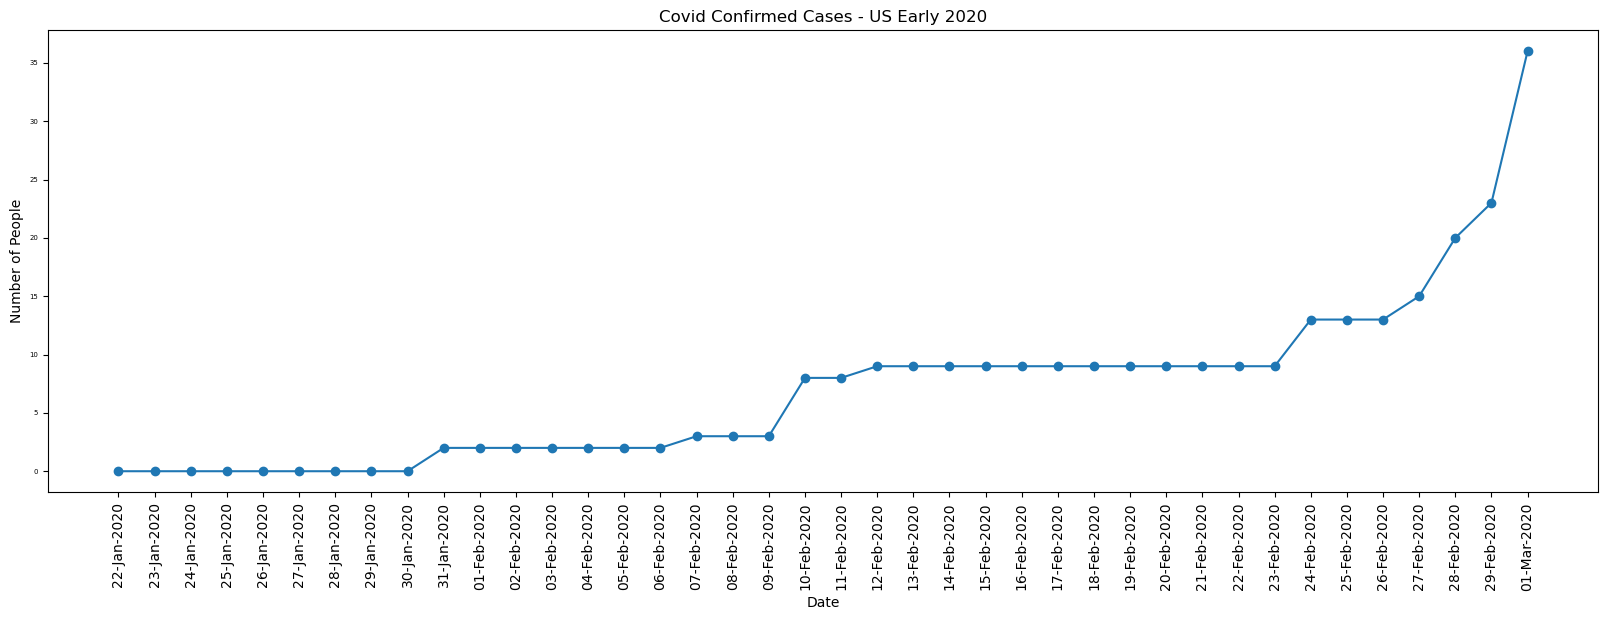

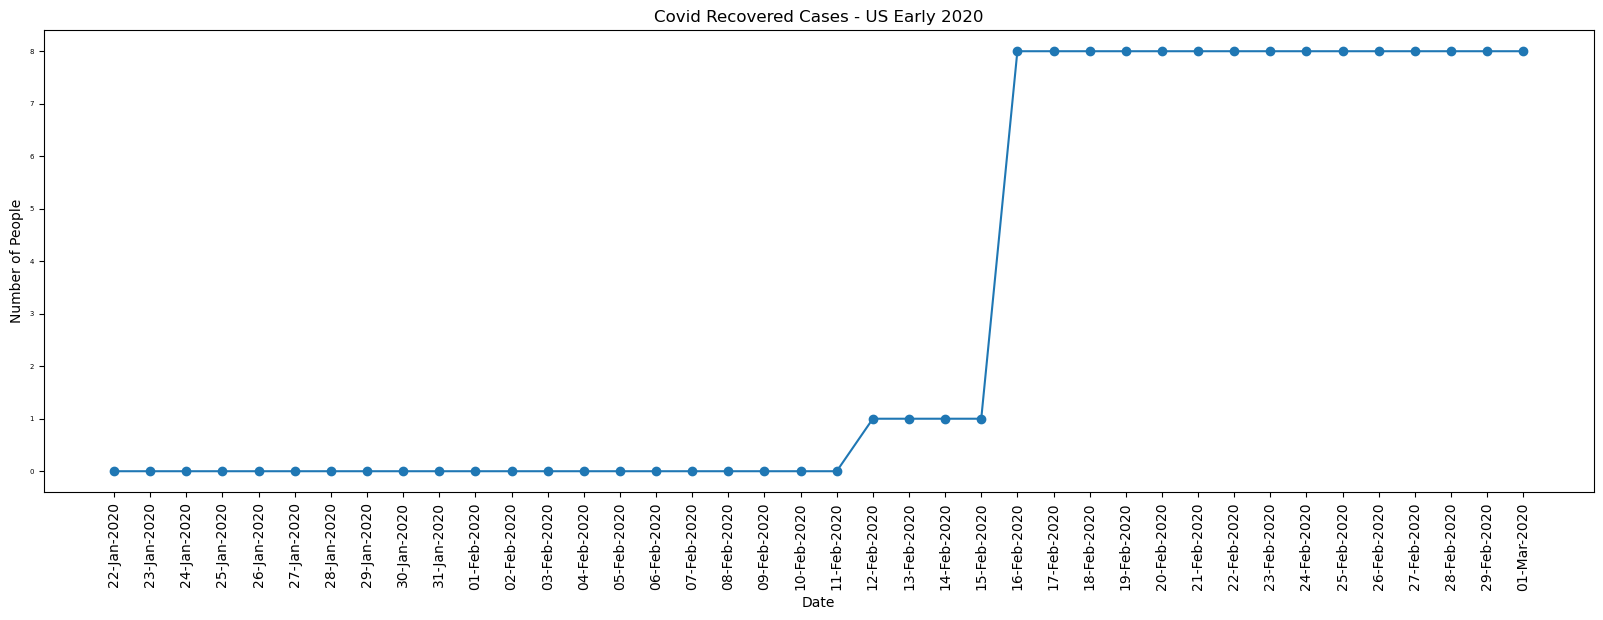

In [17]:
df_UK = all_df[all_df.Country_Region.isin(["United Kingdom"])]
df_US = all_df[all_df.Country_Region.isin(["US"])]
df_UK_dly = df_UK.groupby(['Date','Country_Region'])[['Deaths', 'Confirmed','Recovered']].sum().reset_index(drop=False)
df_US_dly = df_UK.groupby(['Date','Country_Region'])[['Deaths', 'Confirmed','Recovered']].sum().reset_index(drop=False)

PlotGraph(df_UK_dly,"Deaths","Covid Deaths - UK Early 2020")
PlotGraph(df_UK_dly,"Confirmed","Covid Confirmed Cases - UK Early 2020")
PlotGraph(df_UK_dly,"Recovered","Covid Recovered Cases - UK Early 2020")
PlotGraph(df_US_dly,"Deaths","Covid Deaths - US Early 2020")
PlotGraph(df_US_dly,"Confirmed","Covid Confirmed Cases - US Early 2020")
PlotGraph(df_US_dly,"Recovered","Covid Recovered Cases - US Early 2020")

In [18]:
jan_df = pd.DataFrame()

In [19]:
import matplotlib.dates as mdates

def PlotComparisonGraph(df1,df2,df3,Column,graphtitle):
    plt.figure(figsize=(20,6))
    plt.yticks(fontsize=5);
    plt.xticks(fontsize=10,rotation=90);
    plt.ylabel("Number of People", fontsize=10)
    plt.xlabel("Date", fontsize=10)
    plt.title(graphtitle)
    plt.plot(df1['Date'].dt.strftime("%d-%b"),pd.to_numeric(df1[Column]), marker='o')
    plt.plot(df2['Date'].dt.strftime('%d-%b'),pd.to_numeric(df2[Column]), marker='*')
    plt.plot(df3['Date'].dt.strftime('%d-%b'),pd.to_numeric(df3[Column]), marker='x')
    dtFmt = mdates.DateFormatter('%d-%b')
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.gca().legend(('2021','2022','2023'))
    plt.show()

In [20]:
for yr in range(2021,2024):
    csv_files = glob.glob(r'C:\Users\Effer\OneDrive - University of Kent\MAST4016\COVID-19-master\COVID-19-master\csse_covid_19_data\csse_covid_19_daily_reports\01-**-'+str(yr)+'.csv')

    for csv_file in csv_files:
        dfj = pd.read_csv(csv_file,usecols= ['Country_Region','Confirmed','Recovered','Deaths'],sep=',')
        file_name=csv_file[-14:]
        dfj.insert(0,"Date",datetime.strptime(file_name[0:10],'%m-%d-%Y'))
        jan_df = pd.concat([jan_df, dfj])


In [21]:
jan_df_uk = jan_df[jan_df.Country_Region.isin(["United Kingdom"])]
jan_df_uk_dly = jan_df_uk.groupby(['Date','Country_Region'])[['Deaths', 'Confirmed','Recovered']].sum().reset_index(drop=False)

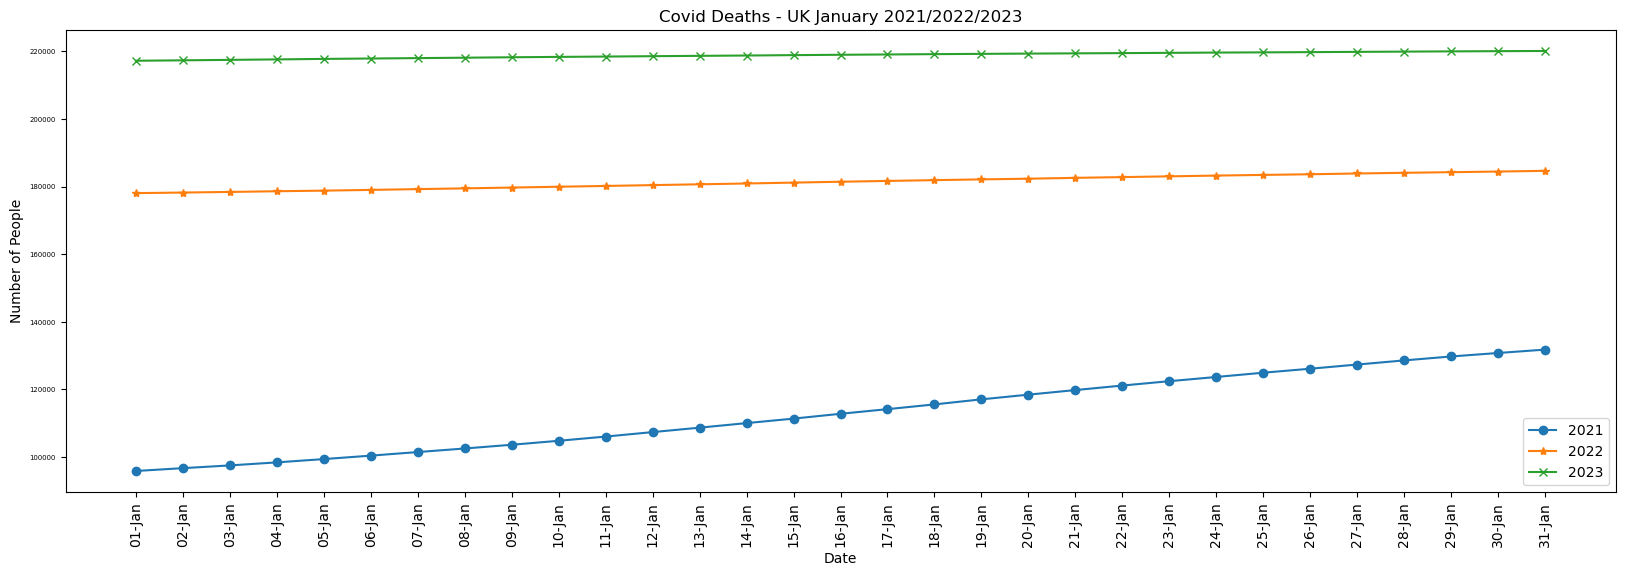

In [22]:
jan2021_df_uk_dly = jan_df_uk_dly[(jan_df_uk_dly['Date'].dt.year==2021)]
jan2022_df_uk_dly = jan_df_uk_dly[(jan_df_uk_dly['Date'].dt.year==2022)]
jan2023_df_uk_dly = jan_df_uk_dly[(jan_df_uk_dly['Date'].dt.year==2023)]
PlotComparisonGraph(jan2021_df_uk_dly,jan2022_df_uk_dly,jan2023_df_uk_dly,"Deaths","Covid Deaths - UK January 2021/2022/2023")

In [23]:
import matplotlib.dates as mdates

def PlotTwoComparisonGraph(df1,df2,Column,graphtitle):
    plt.figure(figsize=(20,6))
    plt.yticks(fontsize=5);
    plt.xticks(fontsize=10,rotation=90);
    plt.ylabel("Number of People", fontsize=10)
    plt.xlabel("Date", fontsize=10)
    plt.title(graphtitle)
    plt.plot(df1['Date'].dt.strftime("%d"),pd.to_numeric(df1[Column]), marker='o')
    plt.plot(df2['Date'].dt.strftime('%d'),pd.to_numeric(df2[Column]), marker='*')
    dtFmt = mdates.DateFormatter('%d')
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.gca().legend(('January 2022','July 2022'))
    plt.show()

In [24]:
brazil_jan_df = pd.DataFrame()
csv_files = glob.glob(r'C:\Users\Effer\OneDrive - University of Kent\MAST4016\COVID-19-master\COVID-19-master\csse_covid_19_data\csse_covid_19_daily_reports\01-**-2022.csv')
for csv_file in csv_files:
    dfb = pd.read_csv(csv_file,usecols= ['Country_Region','Confirmed','Recovered','Deaths'],sep=',')
    file_name=csv_file[-14:]
    dfb.insert(0,"Date",datetime.strptime(file_name[0:10],'%m-%d-%Y'))
    brazil_jan_df = pd.concat([brazil_jan_df, dfb])

brazil_jan_df = brazil_jan_df[brazil_jan_df.Country_Region.isin(["Brazil"])]
brazil_jan_df_dly = brazil_jan_df.groupby(['Date','Country_Region'])[['Deaths', 'Confirmed','Recovered']].sum().reset_index(drop=False)

In [25]:
brazil_jul_df = pd.DataFrame()
csv_files = glob.glob(r'C:\Users\Effer\OneDrive - University of Kent\MAST4016\COVID-19-master\COVID-19-master\csse_covid_19_data\csse_covid_19_daily_reports\07-**-2022.csv')
for csv_file in csv_files:
    dfj = pd.read_csv(csv_file,usecols= ['Country_Region','Confirmed','Recovered','Deaths'],sep=',')
    file_name=csv_file[-14:]
    dfj.insert(0,"Date",datetime.strptime(file_name[0:10],'%m-%d-%Y'))
    brazil_jul_df = pd.concat([brazil_jul_df, dfj])

brazil_jul_df = brazil_jul_df[brazil_jul_df.Country_Region.isin(["Brazil"])]
brazil_jul_df_dly = brazil_jul_df.groupby(['Date','Country_Region'])[['Deaths', 'Confirmed','Recovered']].sum().reset_index(drop=False)

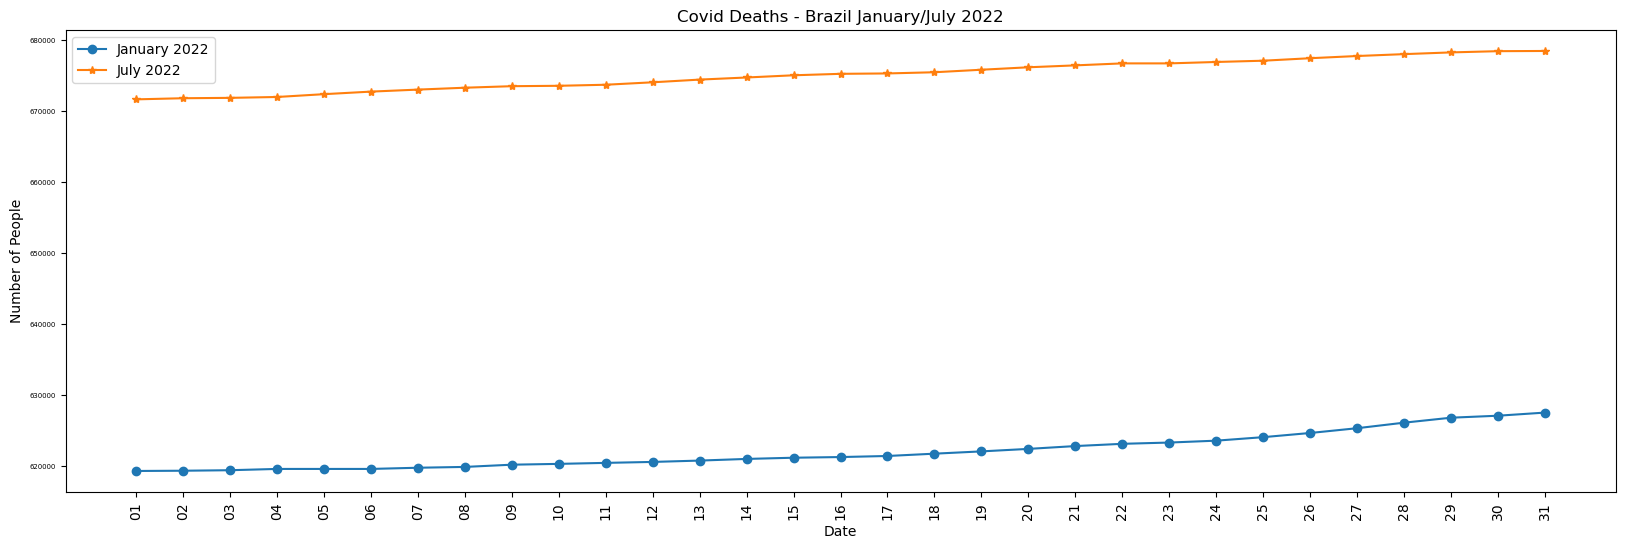

In [26]:
PlotTwoComparisonGraph(brazil_jan_df_dly,brazil_jul_df_dly,"Deaths","Covid Deaths - Brazil January/July 2022")

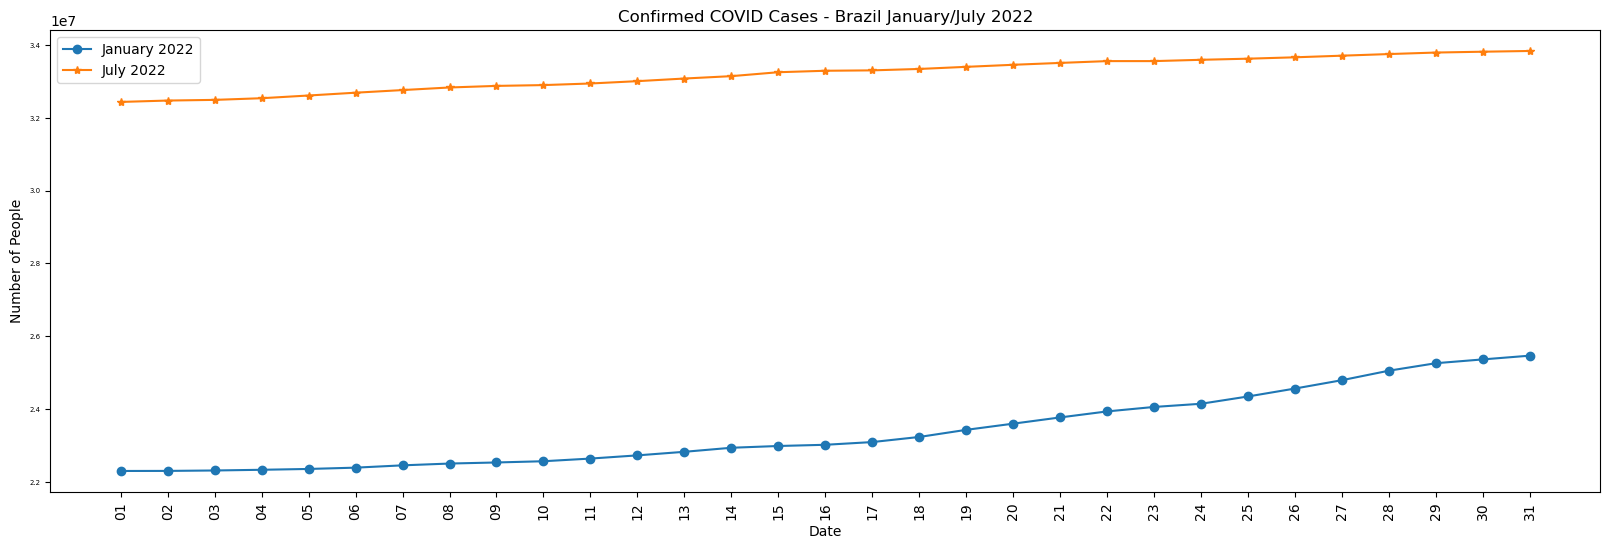

In [58]:
PlotTwoComparisonGraph(brazil_jan_df_dly,brazil_jul_df_dly,"Confirmed","Confirmed COVID Cases - Brazil January/July 2022")

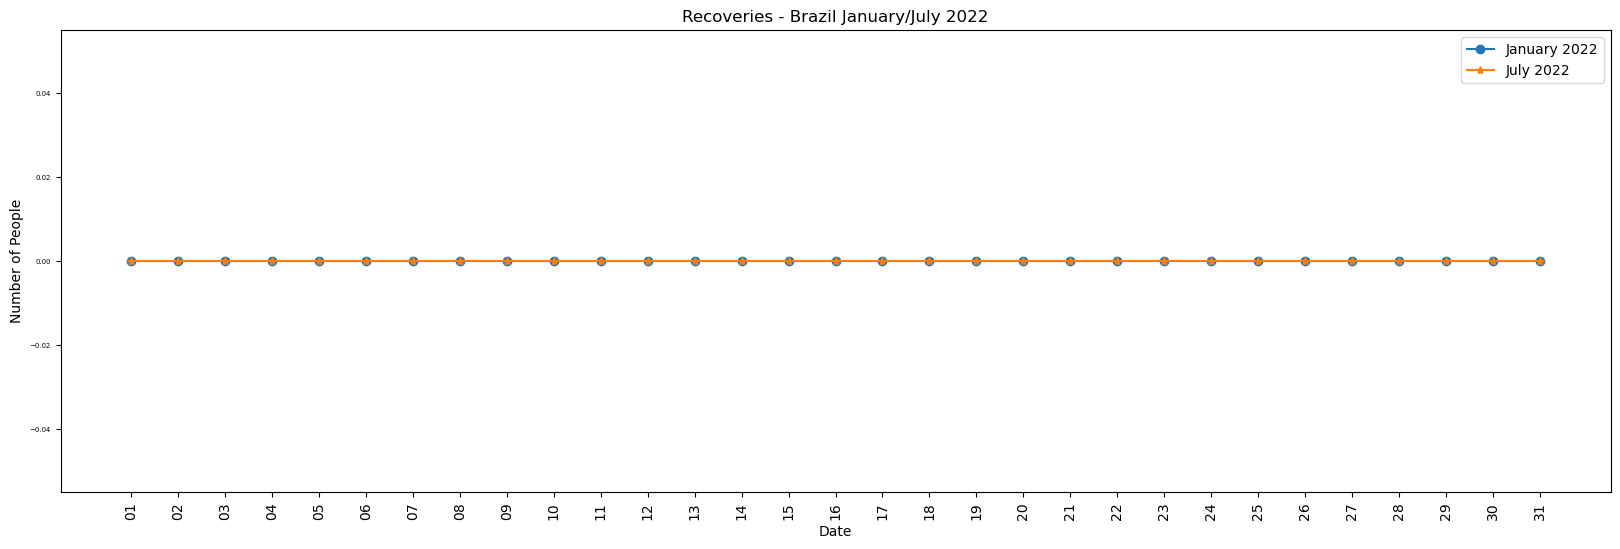

In [59]:
PlotTwoComparisonGraph(brazil_jan_df_dly,brazil_jul_df_dly,"Recovered","Recoveries - Brazil January/July 2022")